In [1]:
!pip install numpy Pillow Matplotlib pandas seaborn scikit-learn requests scikit-image mlxtend prefixspan scikit-fuzzy umap-learn openpyxl stanza torch torchvision tesseract pytesseract nltk wordcloud spacy tensorflow==2.19.0 tensorflow-datasets opencv-python ucimlrepo nbconvert

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.6/45.6 MB 29.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 35.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 65.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 608.4/608.4 kB 35.0 MB/s eta 0:00:00
  Created wheel for prefixspan: filename=prefixspan-0.5.2-py3-none-any.whl size=11215 sha256=277fc5d73377ab0d3b8fe7c70c5411d04b820768ab1e30ae8d0f328ad4cf1bf2
  Stored in directory: /root/.cache/pip/wheels/72/36/65/f9e2bbe4998ab4cdf6e7a015f38bdbb6925301dcf2cce34a88
  Created wheel for tesseract: filename=tesseract-0.1.3-py3-none-any.whl size=45562552 sha256=b80d176d7c95fd2e8184795f65bc88d01fb2b843742bdce442fbb1a72d88efd2
  Stored in directory: /root/.cache/pip/wheels/13/1f/8e/2d6c0e358fd6d01ca80ecd9185a374bcda35

In [2]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [3]:
# cargamos nuestra base de datos
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=10000)

# Padding de secuencias
maxlen = 200
X_train = pad_sequences(X_train, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)

model = Sequential([
	Embedding(10000, 128, input_length=maxlen),
	Bidirectional(LSTM(64)),
	Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=64)

# evaluamos nuestro modelo
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Loss: {loss:.4f}, Accuracy: {accuracy:.4f}")

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


391/391 ━━━━━━━━━━━━━━━━━━━━ 278s 701ms/step - accuracy: 0.7114 - loss: 0.5232 - val_accuracy: 0.8316 - val_loss: 0.3931
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 227s 581ms/step - accuracy: 0.9014 - loss: 0.2553 - val_accuracy: 0.8696 - val_loss: 0.3122
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 295s 665ms/step - accuracy: 0.9325 - loss: 0.1826 - val_accuracy: 0.8586 - val_loss: 0.3356
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 231s 587ms/step - accuracy: 0.9533 - loss: 0.1340 - val_accuracy: 0.8595 - val_loss: 0.4076
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 227s 580ms/step - accuracy: 0.9638 - loss: 0.1005 - val_accuracy: 0.8537 - val_loss: 0.5142
782/782 ━━━━━━━━━━━━━━━━━━━━ 50s 64ms/step - accuracy: 0.8538 - loss: 0.5221
Loss: 0.5142, Accuracy: 0.8537


Evaluar el modelo y ver sus predicciones

782/782 ━━━━━━━━━━━━━━━━━━━━ 48s 62ms/step


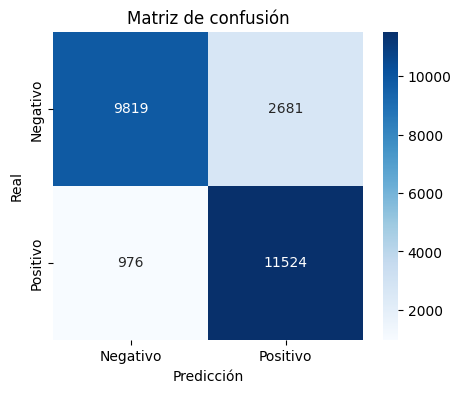

              precision    recall  f1-score   support

    Negativo       0.91      0.79      0.84     12500
    Positivo       0.81      0.92      0.86     12500

    accuracy                           0.85     25000
   macro avg       0.86      0.85      0.85     25000
weighted avg       0.86      0.85      0.85     25000



In [4]:
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype("int32").flatten()

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Negativo", "Positivo"],
    yticklabels=["Negativo", "Positivo"]
)
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de confusión")
plt.show()

print(classification_report(y_test, y_pred, target_names=["Negativo", "Positivo"]))

In [5]:
# diccionario de palabras
word_index = imdb.get_word_index()
reverse_word_index = {value: key for key, value in word_index.items()}

# decodificando una reseña
def decode_review(encoded_review):
    return " ".join([reverse_word_index.get(i - 3, "?") for i in encoded_review])

# Ejemplo: mostramos 5 reviews
for i in range(5):
    print("\nReseña original: ", decode_review(X_test[i]))
    print("Etiqueta real: ", "Positivo" if y_test[i] == 1 else "Negativo")
    print("Predicción modelo: ", "Positivo" if y_pred[i] == 1 else "Negativo")

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

Reseña original:  ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? please give this one a miss br br ? ? and the rest of the cast rendered terrible performances the show is flat flat flat br br i don't know how michael madison could have allowed this one on his plate he almost seemed to know this wasn't going to work out and his performance was quite ? so all you madison fans give this a miss
Etiqueta real:  Negativo
Predicción modelo:  Negativo

Reseña original:  psychological ? it's very interesting that robert altman directed this considering the style and structure of his other films still the trademark altman audio style is evident here and there i think what really makes this film work is the brilliant performance by 